In [1]:
import matplotlib.pylab as plt 
%matplotlib inline
import numpy as np
import rubin_sim.maf_proto as maf
import pandas as pd
import sqlite3
import healpy as hp
import copy
from os.path import basename



In [2]:
db_file = "baseline_v4.3.1_10yrs.db"
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations where night < %i and filter="i";' % (365.25*4), con)
con.close()
visits_array = df.to_records(index=False)


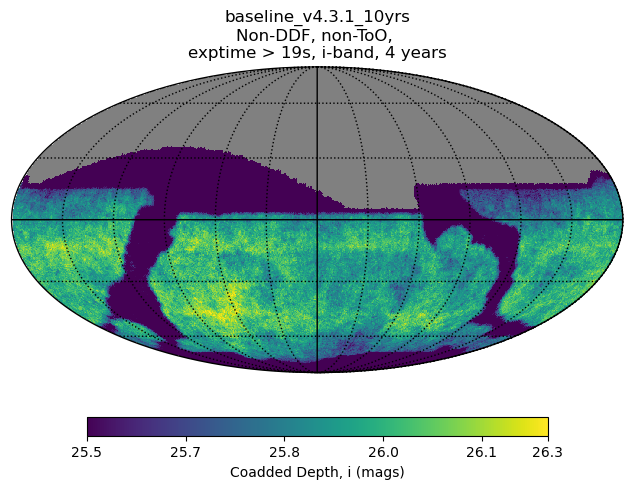

In [3]:
info = {"run_name": run_name}
info["observations_subset"] = "Non-DDF, non-ToO, \nexptime > 19s, i-band, 4 years"
non_ddf = ["DD" not in note and "ToO" not in note for note in visits_array["scheduler_note"]]
sub_data = visits_array[np.where((visits_array["visitExposureTime"] > 19) & (non_ddf))]
sl = maf.Slicer()
metric = maf.CoaddM5Metric("i")
# Run the metics through the slicer
hp_array, info = sl(sub_data, metric, info=info)

pm = maf.PlotMoll(info=info)
fig = pm(hp_array, min=25.5, max=26.2)


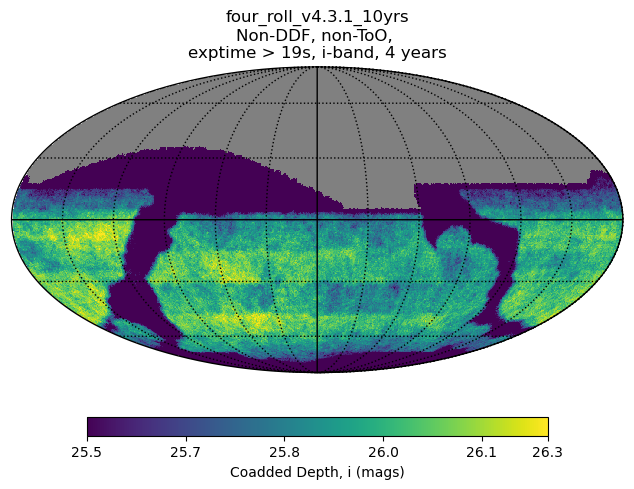

In [4]:
db_file = "four_roll_v4.3.1_10yrs.db"
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations where night < %i and filter="i";' % (365.25*4), con)
con.close()
visits_array = df.to_records(index=False)

info = {"run_name": run_name}
info["observations_subset"] = "Non-DDF, non-ToO, \nexptime > 19s, i-band, 4 years"
non_ddf = ["DD" not in note and "ToO" not in note for note in visits_array["scheduler_note"]]
sub_data = visits_array[np.where((visits_array["visitExposureTime"] > 19) & (non_ddf))]
sl = maf.Slicer()
metric = maf.CoaddM5Metric("i")
# Run the metics through the slicer
hp_array, info = sl(sub_data, metric, info=info)

pm = maf.PlotMoll(info=info)
fig = pm(hp_array, min=25.5, max=26.2)

